In [183]:
# import any packages you'll need to create dataframes and visualize your data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [184]:
# read in the homepage_actions.csv file
data = pd.read_csv("homepage_actions.csv")

In [185]:
# You have two groups: the control group and the experiment group.

# Use the data to determine the average rate at which people click on the call-to-action 
# button vs the ones who do not

# Check the reliability of your data by applying the Bootstrapping method based on the law of large numbers
exp = data['group'] == 'experiment'
experience = data[exp]
con = data['group'] == 'control'
control = data[con]

In [186]:
exp_click = experience[(experience['action'] == 'click')].count()/experience['action'].count()
exp_view = experience[(experience['action'] == 'view')].count()/experience['action'].count()
con_click = control[(control['action'] == 'click')].count()/control['action'].count()
con_view = control[(control['action'] == 'view')].count()/control['action'].count()

In [192]:
exp_click = exp_click[0]
exp_view = exp_view[0]
con_click = con_click[0]
con_view = con_view[0]


IndexError: invalid index to scalar variable.

In [193]:
print(exp_click, exp_view, con_click, con_view)

0.23649337410805302 0.763506625891947 0.21857410881801126 0.7814258911819888


In [194]:
#Average rate of call-to_action
print("Experiment Group: click = " + "{:.2%}".format(exp_click))
print("Control Group: click = " + "{:.2%}".format(con_click))

Experiment Group: click = 23.65%
Control Group: click = 21.86%


In [195]:
averages_experience = []
for _ in range(10000):
    sample = experience.sample(300, replace=False)
    average_e = sample.query('action == "click"')
    averages_experience.append(len(average_e)/300)
    
averages_control = []
for _ in range(10000):
    sample = control.sample(300, replace=False)
    average_c = sample.query('action == "click"')
    averages_control.append(len(average_c)/300)

0.19 0.28
0.19 0.28


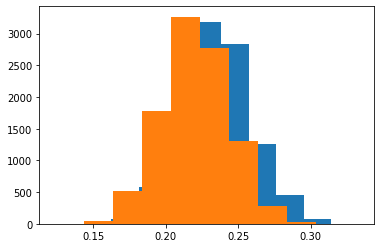

In [197]:
plt.hist(averages_experience)
x = round(np.percentile(averages, 2.5), 2)
y = round(np.percentile(averages, 97.5), 2)
print(x, y)

plt.hist(averages_control)
a = round(np.percentile(averages, 2.5), 2)
b = round(np.percentile(averages, 97.5), 2)
print(a, b)